In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/forwards/ArielInstrumentTier2"
subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

print(subfolders)




['Planet2116', 'Planet4458', 'Planet1469', 'Planet20081', 'Planet16362', 'Planet11026', 'Planet21984', 'Planet239469', 'Planet47692', 'Planet64844', 'Planet209769', 'Planet18', 'Planet416612', 'Planet154053', 'Planet167068', 'Planet10', 'Planet90462', 'Planet11276', 'Planet168373', 'Planet16519', 'Planet105702', 'Planet73955', 'Planet2345', 'Planet46559', 'Planet394093', 'Planet164267', 'Planet81471', 'Planet12188', 'Planet389005', 'Planet146072', 'Planet1283', 'Planet149593', 'Planet84437', 'Planet46851', 'Planet65890', 'Planet33114', 'Planet19196', 'Planet414788', 'Planet100307', 'Planet9906']


(1.2, 4.0)

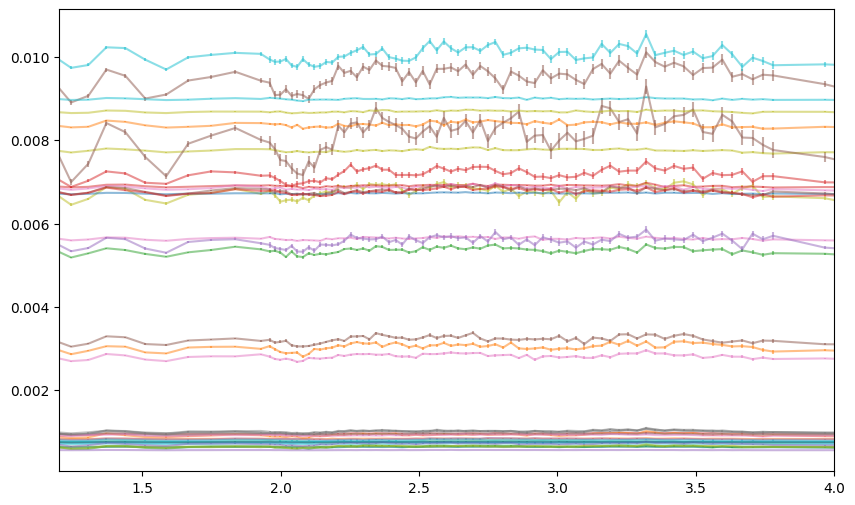

In [2]:
fig = plt.figure(figsize=(10, 6))
for file_ in subfolders:
    data = np.loadtxt('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.txt').T
    plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.5, label=file_)

# plt.legend()
plt.xlim(1.2, 4)

In [3]:
import h5py

nobs = []
for file_ in subfolders:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        # print(f["ModelParameters/Chemistry"].keys())
        nobs.append(f["Output/Spectra/instrument_nobs"][()])

print(nobs)

[163.0, 296.0, 1027.0, 76.0, 103.0, 2.0, 79.0, 13.0, 4.0, 3.0, 258.0, 16.0, 20.0, 125.0, 1802.0, 14.0, 42.0, 79.0, 60.0, 257.0, 411.0, 18.0, 310.0, 4.0, 21.0, 18.0, 23.0, 19.0, 37.0, 152.0, 4918.0, 26.0, 12.0, 25.0, 5.0, 1.0, 49.0, 18.0, 137.0, 88.0]


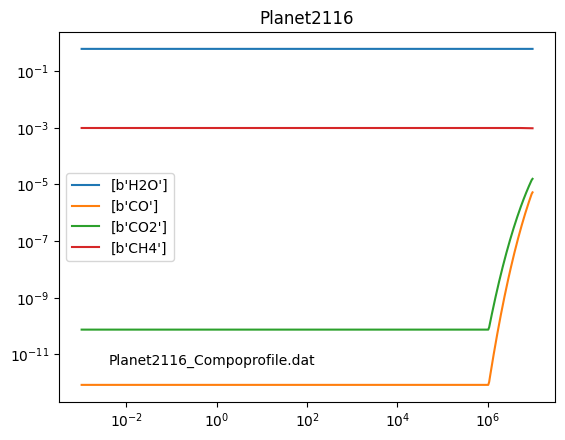

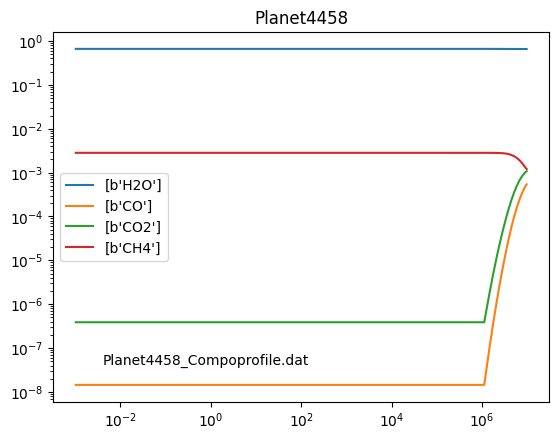

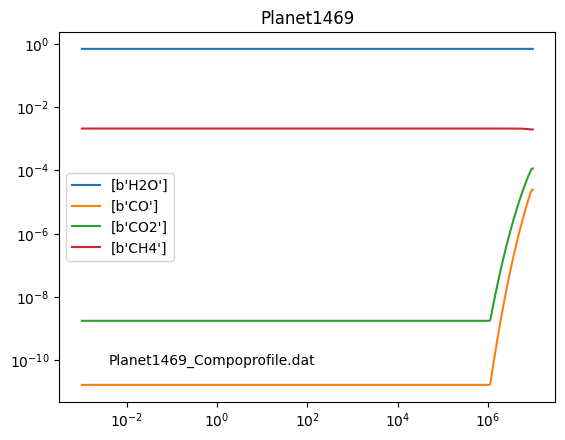

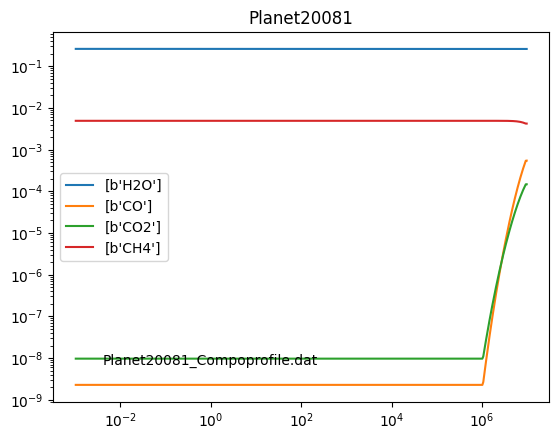

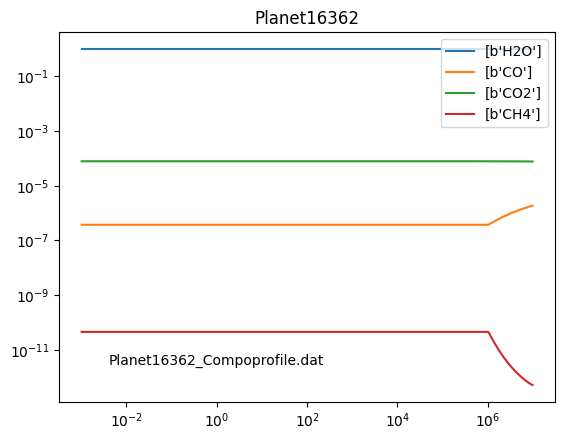

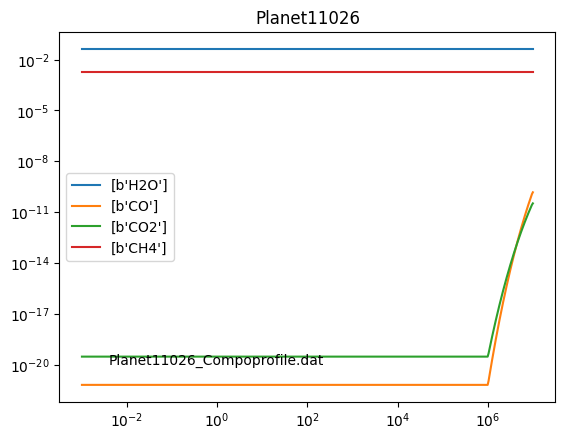

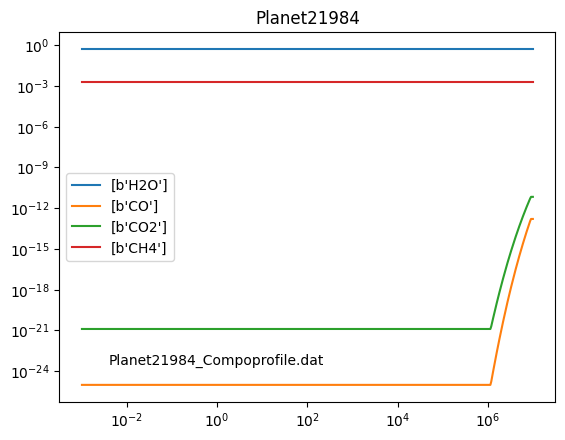

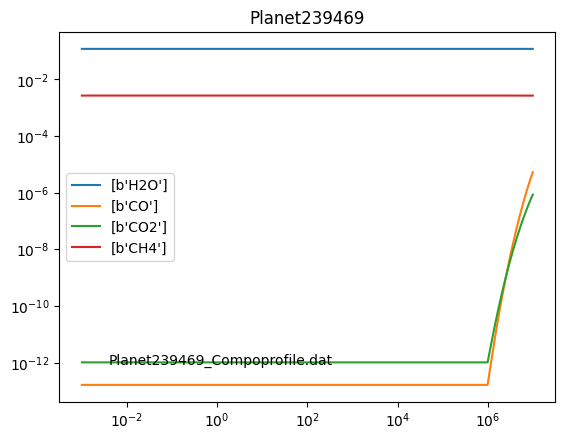

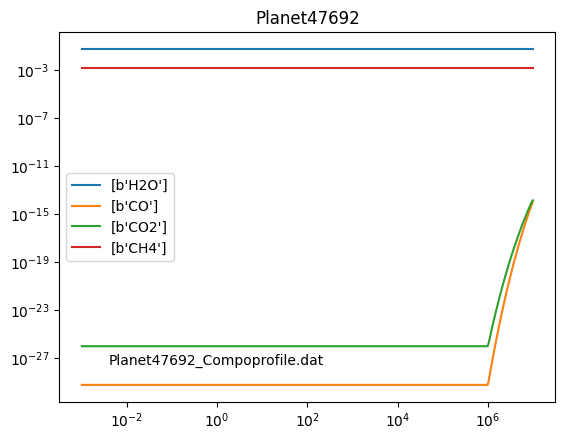

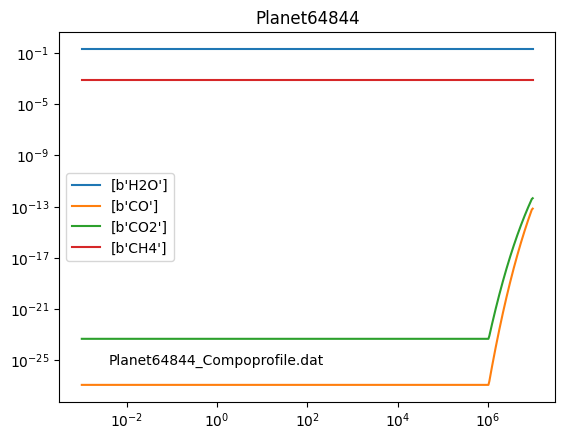

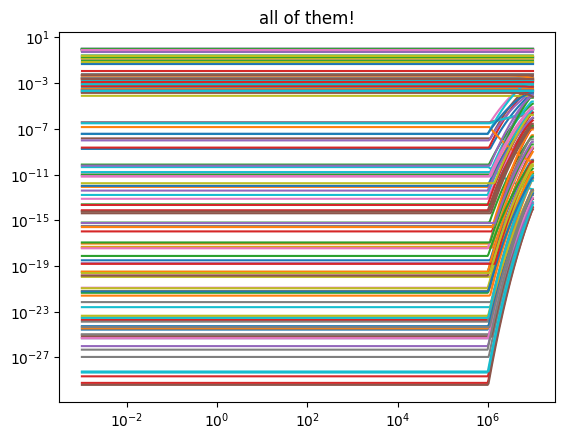

In [5]:
# files = ["Planet99542_Reduced"]
files = subfolders

for file_ in files[:10]:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        plt.title(file_)
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()
        plt.show()
    # nobs.append(f["Output/Spectra/instrument_nobs"][()])
    
    
for file_ in files:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        # plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")

    plt.title("all of them!")

    plt.xscale("log")
    plt.yscale("log")
        # plt.legend()
        # plt.show()